                                   Red Wine Quality Prediction Project

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
import warnings

In [6]:
warnings.filterwarnings('ignore')

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [8]:
df=pd.read_csv("winequality-red.csv")

In [9]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


<AxesSubplot:ylabel='Frequency'>

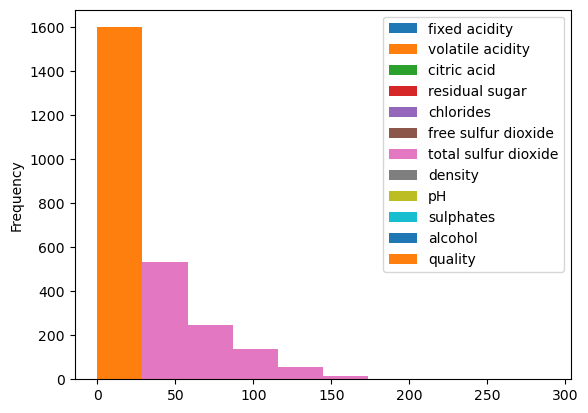

In [12]:
df.plot.hist()

Highest frequency="volatile acidity"

In [13]:
df.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1246,7.4,0.74,0.07,1.7,0.086,15.0,48.0,0.99502,3.12,0.48,10.0,5


In [14]:
#no. of rows and columns

In [15]:
df.shape

(1599, 12)

In [16]:
#checking data types 

In [17]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [19]:
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
df.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [21]:
#statistcal information

In [22]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [23]:
#checking null values

In [24]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

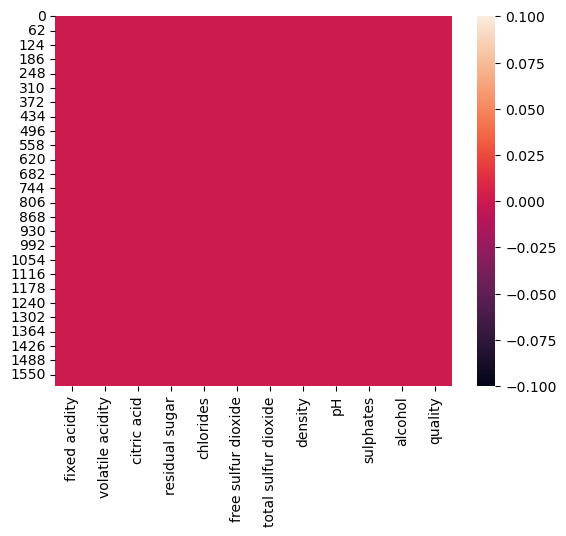

In [25]:
sns.heatmap(df.isnull())

In [26]:
# we can see that no null values here

In [27]:
#unique values of all columns

In [28]:
r=[]
for columns in df:
    r=df[columns].nunique()
    print(r)

96
143
80
91
153
60
144
436
89
96
65
6


In [29]:
df['fixed acidity'].nunique()

96

In [30]:
df['volatile acidity'].nunique()

143

In [31]:
df['citric acid'].nunique()

80

In [32]:
df['residual sugar'].nunique()

91

In [33]:
df['chlorides'].nunique()

153

In [34]:
df['free sulfur dioxide'].nunique()

60

In [35]:
df['total sulfur dioxide'].nunique()

144

In [36]:
df['density'].nunique()

436

In [37]:
df['pH'].nunique()

89

In [38]:
df['sulphates'].nunique()

96

In [39]:
df['alcohol'].nunique()

65

In [40]:
#all unique values

In [41]:
r=[]
for columns in df:
    r=df[columns].unique()
    print(r)

[ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5]
[0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0.695 1.33  0.745 1.04  0.715
 0.415 0.34  0.68  0.95  0.53  0.64  0.885 0.805 0.73  0.37  0.835 1.09
 0.57  0.44  0.635 0.82  0.48  1.    0.21  0.35  0.975 0.26  0.87  0.18
 0.27  

In [42]:
#value count of each column

In [43]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

In [44]:
# Explore the distribution of the target variable 'quality'
quality_counts=df['quality'].value_counts()
quality_proportions=df['quality'].value_counts(normalize=True)

In [45]:
# Plotting the count of samples in each class

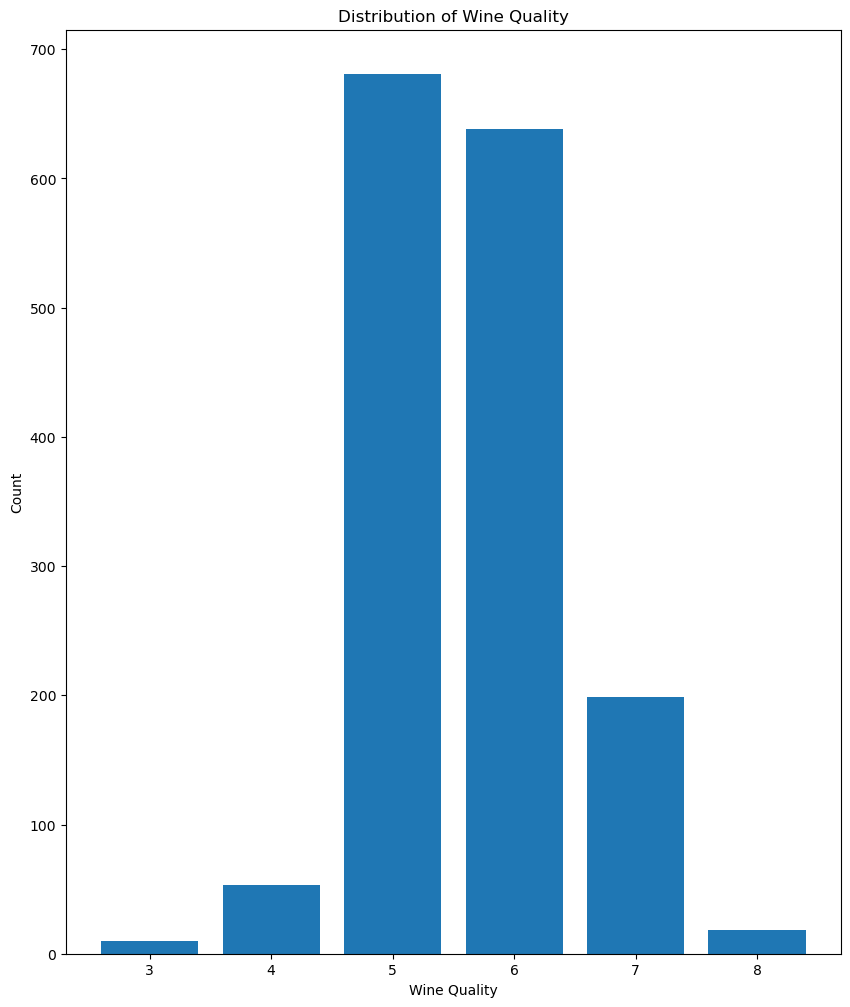

In [46]:
plt.figure(figsize=(10,12))
plt.bar(quality_counts.index, quality_counts.values)
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality')
plt.show()

we can observe from the bar chart and the proportions that there may be more 'normal' wines than 'excellent' or 'poor' ones.

In [47]:
# Displaying the proportions of samples in each class
print("Proportions of Wine Quality:")
print(quality_proportions)

Proportions of Wine Quality:
5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64


In [48]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
# Data preprocessing
X = df.drop('quality', axis=1)
y = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [51]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
# Resample the training data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

In [54]:
# Check the distribution after oversampling
resampled_quality_counts = pd.Series(y_resampled).value_counts()
print("Proportions after oversampling:")
print(resampled_quality_counts)

Proportions after oversampling:
0    1109
1    1109
Name: quality, dtype: int64


In [55]:
#checking correlation between inputs/target variable

In [56]:
c=df.corr()

In [57]:
c

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


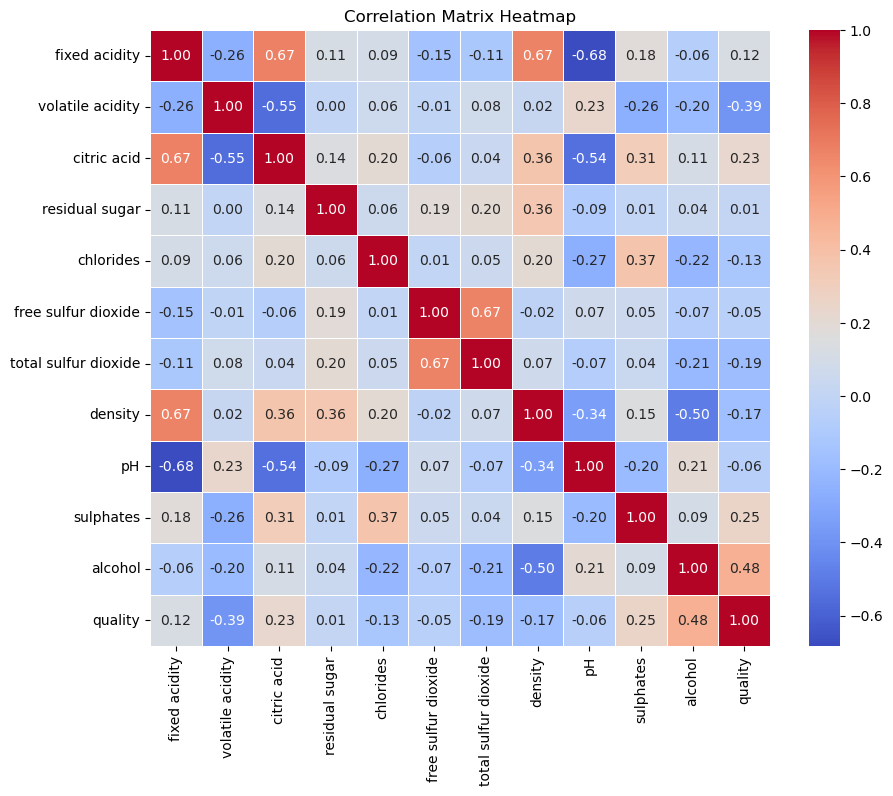

In [58]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(c, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [59]:
# Find highly correlated features with a correlation threshold (e.g., 0.7)
threshold= 0.7
highly_correlated=set()

In [60]:
for i in range(len(c.columns)):
    for j in range(i):
        if abs(c.iloc[i,j]) > threshold:
            col_i = c.columns[i]
            col_j = c.columns[j]
            print(f"High correlation between {col_i} and {col_j}: {c.iloc[i, j]}")
            highly_correlated.add(col_i)
            highly_correlated.add(col_j)


In [61]:
# Remove highly correlated features from the dataset
filtered=df.drop(columns=highly_correlated)

In [62]:
# Display the dataset after removing highly correlated features
print("\nDataset after removing highly correlated features:")
print(filtered.head())


Dataset after removing highly correlated features:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4  

In [63]:
# Train a Random Forest Classifier on the resampled data
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [64]:
# Get feature importances
feature_importances = rfc.feature_importances_

In [65]:
feature_importances

array([0.05599705, 0.1008947 , 0.08023961, 0.05030314, 0.0498062 ,
       0.05744881, 0.09042596, 0.06999049, 0.04927638, 0.16024534,
       0.23537231])

In [66]:
# Create a dataframe to store feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

In [67]:
feature_importance_df

,Feature,Importance
0,fixed acidity,0.055997
1,volatile acidity,0.100895
2,citric acid,0.080240
3,residual sugar,0.050303
4,chlorides,0.049806
5,free sulfur dioxide,0.057449
6,total sulfur dioxide,0.090426
7,density,0.069990
8,pH,0.049276
9,sulphates,0.160245


In [68]:
# Calculate skewness for each feature
skewness = df.drop('quality', axis=1).apply(lambda x: x.skew())

In [69]:
# Display the skewness for each feature
print("Skewness of Features:")
print(skewness)

Skewness of Features:
fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64


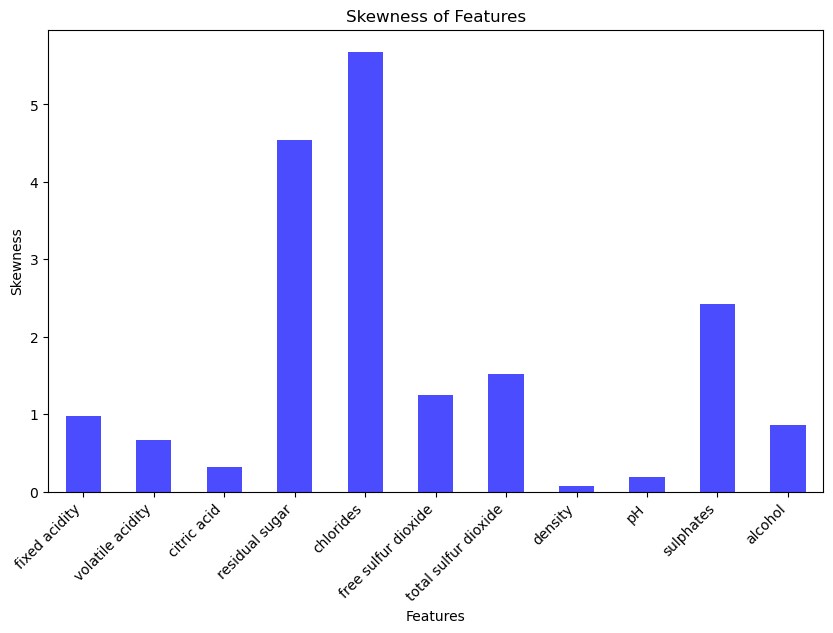

In [70]:
# Create a bar chart to visualize the skewness
plt.figure(figsize=(10, 6))
skewness.plot(kind='bar', color='b', alpha=0.7)
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.title('Skewness of Features')
plt.xticks(rotation=45, ha='right')
plt.show()

In [71]:
# Apply log transformation to features with skewness greater than 1 (adjust the threshold if needed)
skewed_features=skewness[skewness > 1].index
df[skewed_features]=df[skewed_features].apply(lambda x: np.log1p(x))

In [72]:
#checking skewness again

In [73]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          2.255076
chlorides               5.071476
free sulfur dioxide    -0.097399
total sulfur dioxide   -0.035746
density                 0.071288
pH                      0.193683
sulphates               1.610497
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [74]:
# Recalculate skewness after log transformation
skewness_after_log = df.drop('quality', axis=1).apply(lambda x: x.skew())

In [75]:
# Display the skewness after log transformation
print("\nSkewness of Features after Log Transformation:")
print(skewness_after_log)


Skewness of Features after Log Transformation:
fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          2.255076
chlorides               5.071476
free sulfur dioxide    -0.097399
total sulfur dioxide   -0.035746
density                 0.071288
pH                      0.193683
sulphates               1.610497
alcohol                 0.860829
dtype: float64


In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [77]:
classifiers = [DecisionTreeClassifier(random_state=42),
               RandomForestClassifier(random_state=42),
               GradientBoostingClassifier(random_state=42),
               LogisticRegression(random_state=42),
               SVC(random_state=42)]

In [78]:
# Train and fit the classifiers on the resampled data
for clf in classifiers:
    clf.fit(X_resampled, y_resampled)
    y_pred = clf.predict(X_test_scaled)

In [79]:
from sklearn.metrics import accuracy_score, classification_report

In [80]:
 # Evaluate the model
print(f"\nModel: {clf.__class__.__name__}")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Model: SVC
Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91       273
           1       0.49      0.85      0.62        47

    accuracy                           0.85       320
   macro avg       0.73      0.85      0.77       320
weighted avg       0.90      0.85      0.86       320



BEST FIT MODEL = SUPPORT VECTOR CLASSIFIER (accuracy=85%)

In [81]:
# Define a grid of hyperparameters for each classifier
param_grid_decision_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [82]:
param_grid_random_forest = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]}

In [83]:
param_grid_gradient_boosting = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [84]:
param_grid_logistic_regression = {
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'lbfgs']
}

In [85]:
param_grid_svm = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf']
}

In [ ]:
# List of classifiers and their corresponding parameter grids
classifiers = [
    (DecisionTreeClassifier(random_state=42), param_grid_decision_tree),
    (RandomForestClassifier(random_state=42), param_grid_random_forest),
    (GradientBoostingClassifier(random_state=42), param_grid_gradient_boosting),
    (LogisticRegression(random_state=42), param_grid_logistic_regression),
    (SVC(random_state=42), param_grid_svm)
]

In [87]:
# Perform hyperparameter tuning for each classifier using Grid Search
for clf, param_grid in classifiers:
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_resampled, y_resampled)

In [88]:
# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [89]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)

In [90]:
from sklearn.metrics import f1_score

In [91]:
# Evaluate the model
print(f"\nModel: {best_model.__class__.__name__}")
print("Best Hyperparameters:", best_params)
print("F1-Score:", f1_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Model: SVC
Best Hyperparameters: {'C': 10.0, 'kernel': 'rbf'}
F1-Score: 0.6434782608695653
Accuracy: 0.871875
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       273
           1       0.54      0.79      0.64        47

    accuracy                           0.87       320
   macro avg       0.75      0.84      0.78       320
weighted avg       0.90      0.87      0.88       320



SVC model (accuracy=87%)

In [92]:
from sklearn.metrics import  precision_score, recall_score, roc_auc_score, roc_curve, auc

In [93]:
# Evaluate the model
print(f"\nModel: {clf.__class__.__name__}")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))


Model: SVC
Accuracy: 0.871875
Precision: 0.5441176470588235
Recall: 0.7872340425531915
F1-Score: 0.6434782608695653
ROC-AUC: 0.8368404645000389


ROC-AUC Curve=83%

In [94]:
# Dictionary to store evaluation metrics for each model
metrics_dict={}

In [95]:
# List of corresponding parameter grids for hyperparameter tuning
param_grids = [
    {},  # Empty dictionary for DecisionTreeClassifier
    {},  # Empty dictionary for RandomForestClassifier
    {},  # Empty dictionary for GradientBoostingClassifier
    {'C': [0.1, 1.0, 10.0], 'solver': ['liblinear', 'lbfgs']},  # Parameter grid for LogisticRegression
    {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']} ] # Parameter grid for SVC

In [96]:
 y_pred = best_model.predict(X_test_scaled)

In [97]:
# Evaluate the model
model_name = best_model.__class__.__name__
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [98]:
 # Store evaluation metrics in the dictionary
metrics_dict[model_name] = {'Accuracy': accuracy,'Precision': precision,'Recall': recall,'F1-Score': f1,'ROC-AUC': roc_auc}

In [99]:
# Print the evaluation metrics for each model
print("\nModel Comparison:")
for model, metrics in metrics_dict.items():
    print(f"\nModel: {model}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")



Model Comparison:

Model: SVC
Accuracy: 0.871875
Precision: 0.5441176470588235
Recall: 0.7872340425531915
F1-Score: 0.6434782608695653
ROC-AUC: 0.8368404645000389


In [100]:
# Select the best model based on the chosen evaluation metric (e.g., F1-Score)
best_model = max(metrics_dict, key=lambda x: metrics_dict[x]['F1-Score'])
print(f"\nBest Model based on F1-Score: {best_model}")


Best Model based on F1-Score: SVC


In [102]:
 #Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

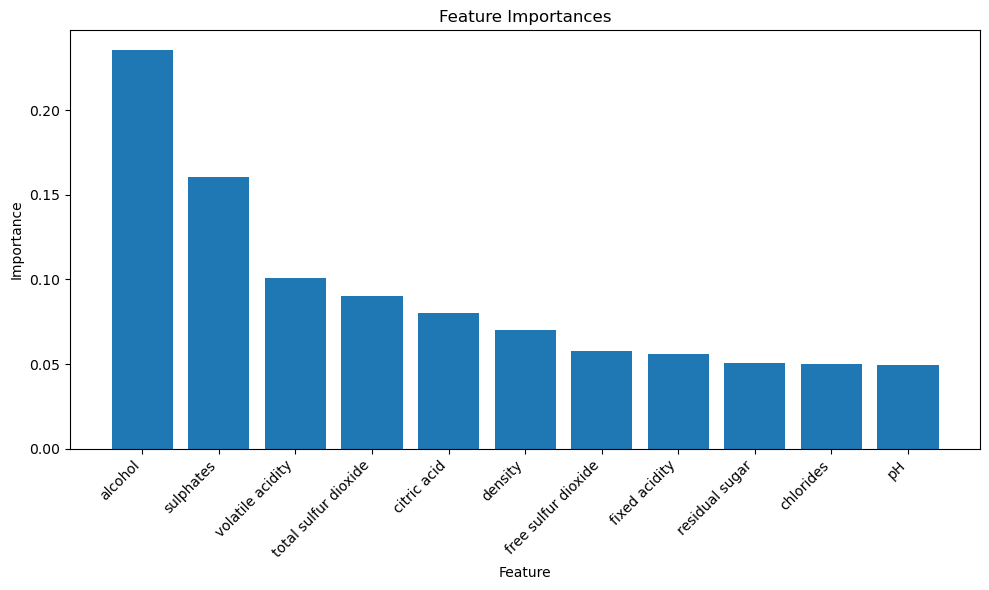

In [103]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [104]:
# Print the top 5 most important features
print("\nTop 5 Most Important Features:")
print(feature_importance_df.head(5))


Top 5 Most Important Features:
                 Feature  Importance
10               alcohol    0.235372
9              sulphates    0.160245
1       volatile acidity    0.100895
6   total sulfur dioxide    0.090426
2            citric acid    0.080240


In [106]:
import joblib

In [107]:
# Save the model to a file
model_filename = 'best_model.pkl'
joblib.dump(best_model, model_filename)

['best_model.pkl']

In [108]:
# Load the model from the file
loaded_model = joblib.load(model_filename)